In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# independent sample t-test

overlop - 뮤1에 대한 신뢰구간과
뮤2에 대한 신뢰구간이 만날 때
- 오차범위내 접전이라고 말함!
이 경우 표본에서 한 쪽이 크게 차이가 있음에도         
불구하고 모집단에서는 다르게
나타날 수 있다는 것을 의미함

overlop -?
yes or no
yes - 뮤1=뮤2 / NO - 뮤1!=뮤2
kt 뮤1에 대한 신뢰구간과
LG에 대한 뮤2에 대한 신뢰구간이 겹치나?

두 표본 평균의 차이 의 분산은 결국 1의 표본 분산과 2의 표본 분산의 합과 같다.

**두 집단 평균 비교의 세 가지 방법 - 영가설을 설정하는 3방법**

1. cI for 뮤1-뮤2 (0을 includes?)
2. 가설 검정 x바1과 x바2의 차이로   - 검정통계량 비교 또    
는 유의확률과 유의수준의 비교를 통해서!
3. 뮤1의 CI VS 뮤2의 CI 를 비교하기

## spending by provider

In [2]:
import pandas as pd
import scipy as sp
from scipy import stats
import numpy as np, statsmodels.stats.api as sms

In [3]:
mobile=pd.read_csv('/content/drive/MyDrive/data analysis and coding/mobile.csv')

In [4]:
# descriptive statistics of spending by provider
mobile.groupby(mobile['provider'])[['spending']].describe()

spending                                                           \
            count         mean         std    min     25%     50%      75%   
provider                                                                     
kt           28.0  1025.000000  150.000988  786.0  898.50  1007.5  1137.25   
lgu          22.0   910.045455  124.996563  704.0  814.25   902.0   978.00   

                  
             max  
provider          
kt        1289.0  
lgu       1226.0

In [5]:
# Filter spending data for 'kt' and 'lgu'
kt_spending = mobile[mobile['provider'] == 'kt']['spending']
lgu_spending = mobile[mobile['provider'] == 'lgu']['spending']

In [6]:
# Compute the 95% confidence interval for the difference in means assuming unequal variances
conf = sms.CompareMeans(sms.DescrStatsW(kt_spending), sms.DescrStatsW(lgu_spending))
conf_int = conf.tconfint_diff(usevar='unequal')
print(conf_int)

(np.float64(36.71814838681988), np.float64(193.19094252227111))


In [7]:
# Perform independent sample t-test assuming unequal variances
ind_ttest = stats.ttest_ind(kt_spending, lgu_spending, equal_var=False)
print(ind_ttest)

TtestResult(statistic=np.float64(2.954582827786239), pvalue=np.float64(0.004846876117117007), df=np.float64(47.80538492909062))


## age by newspaper

In [8]:
import pandas as pd
import scipy as sp
from scipy import stats
import numpy as np, statsmodels.stats.api as sms

In [9]:
newsp=pd.read_csv('/content/drive/MyDrive/data analysis and coding/newspaper.csv')

In [10]:
# descriptive statistics of age by newspaper
newsp.groupby(newsp['newspaper'])[['age']].describe()

age                                               
          count  mean       std   min   25%   50%    75%   max
newspaper                                                     
Chosun     36.0  40.0  8.847921  23.0  35.0  39.5  44.25  62.0
Hankyoreh  49.0  35.0  9.918417  10.0  28.0  37.0  40.00  52.0

### comparison of variance

H0: 1집단의 분산과 2집단의 분산은 같다.

아래의 코드는 이 영가설에 대한 검정이다.

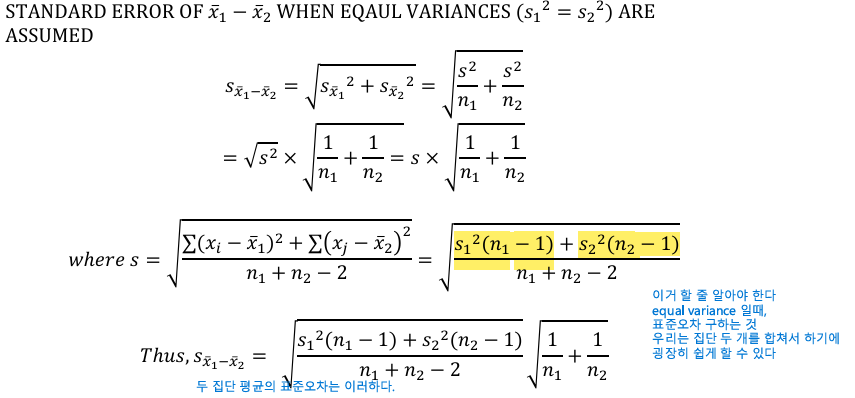

In [11]:
# Filter age data for 'Chosun' and 'Hankyoreh'
Chosun_age=newsp[newsp['newspaper']=='Chosun']['age']
Hankyoreh_age=newsp[newsp['newspaper']=='Hankyoreh']['age']

In [12]:
levene_test=sp.stats.levene(Chosun_age, Hankyoreh_age)
print(levene_test) # fail to reject the nulll of equal variance. thus equal variance is assumed

LeveneResult(statistic=np.float64(0.31990560597912776), pvalue=np.float64(0.5731902529926391))


이 경우 영가설 기각에 실패했기 때문에 동분산성이 가정된다(즉, 집단1과 집단2의 모집단 분산이 같다고 가정한다)

### comparison of means

#### confidence interval

In [13]:
# Compute the 95% confidence interval for the difference in means assuming unequal variances
conf = sms.CompareMeans(sms.DescrStatsW(Chosun_age), sms.DescrStatsW(Hankyoreh_age))
conf_unequal = conf.tconfint_diff(usevar='unequal')
print(conf_unequal)

(np.float64(0.9300812379258208), np.float64(9.06991876207418))


In [14]:
# Compute the 95% confidence interval for the difference in means assuming equal variances
conf = sms.CompareMeans(sms.DescrStatsW(Chosun_age), sms.DescrStatsW(Hankyoreh_age))
conf_equal = conf.tconfint_diff(usevar='pooled')
print(conf_equal)

(np.float64(0.8602439478783559), np.float64(9.139756052121644))


unequal variace의 95% 신뢰구간과 동분산 가정 95% 신뢰구간 다르다
t값 equal과 t값 unequl도 다르다. (t값도 달랐다)
왜냐하면 두 표본평균의 표준오차가 서로 다르기 떄문이다.    

#### hypothesis testing

In [15]:
# Perform independent sample t-test assuming unequal variances (Welch's t-test)
unequal_ttest = stats.ttest_ind(Chosun_age, Hankyoreh_age, equal_var=False)
print(unequal_ttest)

TtestResult(statistic=np.float64(2.4449201827670493), pvalue=np.float64(0.016690168167128084), df=np.float64(79.83828376276986))


In [16]:
# Perform independent sample t-test assuming equal variances
equal_ttest = stats.ttest_ind(Chosun_age, Hankyoreh_age, equal_var=True)
print(equal_ttest)

TtestResult(statistic=np.float64(2.4022668910113816), pvalue=np.float64(0.018525236964311024), df=np.float64(83.0))


In [17]:
# defalut is equal_var=True
equal_ttest = stats.ttest_ind(Chosun_age, Hankyoreh_age)
print(equal_ttest)

TtestResult(statistic=np.float64(2.4022668910113816), pvalue=np.float64(0.018525236964311024), df=np.float64(83.0))


95% 신뢰수준에서 두 결과가 두가지 측면에서 다르게 나타남
그 이유는 동분산 가정하면 s를 썼지만, 분산 다른 것을 가정하면 s1과 s2로 나눠서 했기 때문임.(seperate deviation을 했기 때문)              

### visualization

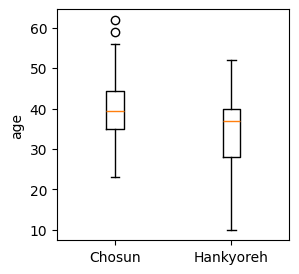

In [18]:
# boxplot
import matplotlib.pyplot as plt # import package
plt.figure(figsize=(3, 3)) # Width = 3 inches, Height = 3 inches
plt.boxplot((Chosun_age, Hankyoreh_age))
plt.ylabel("age") # y-axis label
plt.xticks([1, 2], ['Chosun', 'Hankyoreh']) # set x-axis labels
plt.show() # Show the plot

/tmp/ipython-input-1073104264.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Chosun_age, color="red", label='Chosun')
/tmp/ipython-input-1073104264.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hankyoreh_age, color="green",label='Hankyoreh')


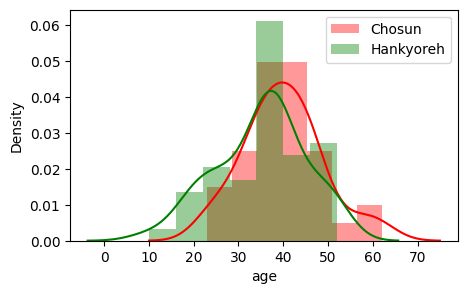

In [19]:
# histogram
import matplotlib.pyplot as plt # import package
import seaborn as sns # impart package
plt.figure(figsize=(5, 3)) # Width = 5 inches, Height = 3 inches
sns.distplot(Chosun_age, color="red", label='Chosun')
sns.distplot(Hankyoreh_age, color="green",label='Hankyoreh')
plt.legend() # Add legend to indicate which color corresponds to which dataset
plt.show() # Show the plot

# paired t-test

## iphone vs. galaxy completion time

In [20]:
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms

In [21]:
devices=pd.read_csv('/content/drive/MyDrive/data analysis and coding/devices.csv')

In [22]:
# Extract the iPhone and Galaxy columns
iphone_time = devices['iphone']
galaxy_time = devices['galaxy']
print(iphone_time.describe(),'\n')
print(galaxy_time.describe())

count    6.000000
mean     6.100000
std      0.654217
min      5.000000
25%      6.000000
50%      6.100000
75%      6.350000
max      7.000000
Name: iphone, dtype: float64 

count    6.000000
mean     5.800000
std      0.460435
min      5.200000
25%      5.500000
50%      5.850000
75%      5.975000
max      6.500000
Name: galaxy, dtype: float64


### hypothesis testing

In [23]:
# Perform paired t-test
paired_ttest = stats.ttest_rel(iphone_time, galaxy_time)
print(paired_ttest)

TtestResult(statistic=np.float64(2.1957751641341994), pvalue=np.float64(0.07951591461959698), df=np.int64(5))


fail fo reject H0!!

### confidence interval

In [24]:
# Compute the 95% confidence interval for the difference
diff_time = iphone_time - galaxy_time
cm = sms.DescrStatsW(diff_time)
conf_int = cm.tconfint_mean()
print(conf_int)

(np.float64(-0.05120834012847153), np.float64(0.6512083401284715))


### visualization

/tmp/ipython-input-3144346261.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iphone_time , color="skyblue", label="iphone")
/tmp/ipython-input-3144346261.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(galaxy_time, color="red", label="galaxy")


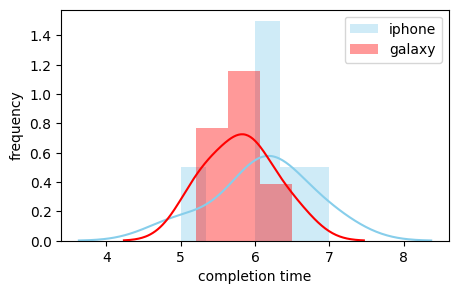

In [25]:
# histogram
import matplotlib.pyplot as plt # import package
import seaborn as sns # import package
plt.figure(figsize=(5, 3)) # Width = 5 inches, Height = 3 inches
sns.distplot(iphone_time , color="skyblue", label="iphone")
sns.distplot(galaxy_time, color="red", label="galaxy")
plt.legend() # Add legend to indicate which color corresponds to which dataset
plt.xlabel("completion time") # x-axis label
plt.ylabel("frequency") # y-axis label
plt.show() # Show the plot